In [1]:
from bs4 import BeautifulSoup
import html
from splinter import Browser
import pandas as pd
import time

In [2]:
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url = 'https://www.politico.com/news/2020/11/21/trump-gop-elections-challenge-438938'
browser.visit(url)

<html class="js no-touch cssanimations csstransforms svg inlinesvg" lang="en" style="">
 <!--<![endif]-->
 <head>
  <script src="https://m.addthis.com/live/red_lojson/300lo.json?si=5fbb301873ded82a&amp;bkl=0&amp;bl=1&amp;pdt=2806&amp;sid=5fbb301873ded82a&amp;pub=politico.com&amp;rev=v8.28.8-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.politico.com&amp;fp=news%2F2020%2F11%2F21%2Ftrump-gop-elections-challenge-438938&amp;fr=&amp;of=0&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;colc=1606103064976&amp;jsl=143489&amp;uvs=5fbb30185b17b4fd000&amp;skipb=1&amp;callback=addthis.cbs.jsonp__318404061166084550" type="text/javascript">
  </script>
  <script src="https://v1.addthisedge.com/live/boost/politico.com/_ate.track.config_resp" type="text/javascript">
  </script>
  <script async="" crossorigin="anonymous" src="https://connect.facebook.net/en_US/sdk.js?hash=2e1295d39c85a6a20aadd71df20aa5aa&amp;ua=modern_es
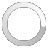
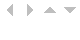

In [4]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

In [5]:
body = soup.find_all('p', class_='story-text__paragraph')
for p in body:
    print(p.text)

President Donald Trump has driven senators into retirement and tweeted wayward Republicans into primary defeat during four years leading the GOP. Now, as a lame duck, he’s launched a new campaign against GOP election officials who won’t bend to his will. 
Trump’s drive to discredit the results of an election he lost has put him at odds with the Republican elected officials and administrators who oversaw the vote in key states — and called it what it was: a free and fair election. Being at odds with Trump doesn’t go over well in today’s Republican Party, and Trump has turned their political bases against them, even unleashing threats from his most rabid supporters. 
No GOP official has caught more flak than Georgia Secretary of State Brad Raffensperger, a fairly conventional Republican who won the job as Georgia’s top election official two years ago running as a rock-ribbed, anti-voter fraud conservative — with Trump’s endorsement. Now, after refusing strident calls from Trump and allie

In [6]:
df = pd.read_csv('final_cleaned_dataset.csv')

In [8]:
df3 = df.loc[df['Source']=='Politico']
df3.head()

,Keyword,Source,Author,Title,URL,Text,Published,compound score,negative score,positive score,neutral score
193,immigrant,Politico,Josh Gerstein,Appeals court OKs Trump plan to end protected ...,https://www.politico.com/news/2020/09/14/court...,The Secretarys discretion to make TPS determin...,2020-09-14T19:24:12Z,0.4404,0.000,0.209,0.791
194,immigrant,Politico,Mackenzie Mays,"California schools launch anti-racism plan, fl...",https://www.politico.com/states/california/sto...,An empty classroom is seen at Hollywood High S...,2020-09-22T00:12:20Z,-0.4215,0.286,0.000,0.714
195,immigrant,Politico,By Erin Durkin,De Blasio calls Trump's funding threat 'insult...,https://www.politico.com/news/2020/09/24/de-bl...,De Blasio said the city will fight the move in...,2020-09-24T18:05:10Z,-0.5267,0.386,0.000,0.614
196,immigrant,Politico,Janaki Chadha,How the left killed another major NYC development,https://www.politico.com/news/2020/09/25/how-t...,The projects fate was sealed when Velázquez be...,2020-09-25T22:49:20Z,-0.6705,0.391,0.000,0.609
197,immigrant,Politico,Sabrina Rodriguez and Marc Caputo,‘This is f—ing crazy’: Florida Latinos swamped...,https://www.politico.com/news/2020/09/14/flori...,"At the same time, there has been a rise of Spa...",2020-09-14T08:30:09Z,-0.5267,0.254,0.000,0.746


In [9]:
count = 0
d_l = []

In [10]:
for url in df3['URL']:
    browser.visit(url)
    time.sleep(1)
    html = browser.html   
    soup = BeautifulSoup(html, 'html.parser')
    body = ''
    x = soup.find_all('p', class_='story-text__paragraph')
    for one in x:
        body += one.text + '\n'
    dictionary = {
        'url': url,
        'body': body,
    }
    d_l.append(dictionary)
    time.sleep(1)
    count +=  1
    print(count)

browser.quit()

NameError: name 'df3' is not defined